In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from itertools import zip_longest

In [38]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv("telecom_customer_churn.csv")
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [39]:
df['Churn Category'] = df['Churn Category'].replace(np.nan,'satisfied')
df['Internet Type'] = df['Internet Type'].replace(np.nan,'No data')
df['Multiple Lines'] = df['Multiple Lines'].replace(np.nan,'NO phone Service')
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].replace(np.nan,'No phone Service')
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].replace(np.nan,'')

In [40]:
df = df.drop(['Churn Reason','Customer ID','Total Refunds'],axis=1)
df.head()

Gender  Age Married  Number of Dependents          City  Zip Code  \
0  Female   37     Yes                     0  Frazier Park     93225   
1    Male   46      No                     0      Glendale     91206   
2    Male   50      No                     0    Costa Mesa     92627   
3    Male   78     Yes                     0      Martinez     94553   
4  Female   75     Yes                     0     Camarillo     93010   

    Latitude   Longitude  Number of Referrals  Tenure in Months  ...  \
0  34.827662 -118.999073                    2                 9  ...   
1  34.162515 -118.203869                    0                 9  ...   
2  33.645672 -117.922613                    0                 4  ...   
3  38.014457 -122.115432                    1                13  ...   
4  34.227846 -119.079903                    3                 3  ...   

         Contract Paperless Billing   Payment Method Monthly Charge  \
0        One Year               Yes      Credit Card           65.6   
1  Month-to-Month                No      Credit Card           -4.0   
2  Month-to-Month               Yes  Bank Withdrawal           73.9   
3  Month-to-Month               Yes  Bank Withdrawal           98.0   
4  Month-to-Month               Yes      Credit Card           83.9   

  Total Charges Total Extra Data Charges Total Long Distance Charges  \
0        593.30                        0                      381.51   
1        542.40                       10                       96.21   
2        280.85                        0                      134.60   
3       1237.85                        0                      361.66   
4        267.40                        0                       22.14   

  Total Revenue Customer Status   Churn Category  
0        974.81          Stayed        satisfied  
1        610.28          Stayed        satisfied  
2        415.45         Churned       Competitor  
3       1599.51         Churned  Dissatisfaction  
4        289.54         Churned  Dissatisfaction  

[5 rows x 35 columns]

In [41]:
fig = px.histogram(df, x='Total Charges')
fig

In [42]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')
fig1 = px.histogram(df, x="Total Revenue", color="Gender", marginal="rug", hover_data=df_object.columns)
fig1.show()

In [43]:
fig7 = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Total Revenue", size="Age", animation_frame="Tenure in Months",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4,
                  mapbox_style="carto-positron")
fig7.show()

In [44]:
bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
df_object['AgeRange'] = pd.cut(df['Age'],bins, labels=names,include_lowest=True)
fig4 =px.box(df_object.join(df_num),x='AgeRange',y='Avg Monthly GB Download', color ='Customer Status')
fig4

c:\Users\61406\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
fig5 =px.box(df_object.join(df_num),x='AgeRange',y='Tenure in Months', color ='Customer Status')
fig5

KeyboardInterrupt: 

In [ ]:
fig6 =px.box(df_object.join(df_num),x='Gender',y='Tenure in Months', color ='Customer Status')
fig6

In [ ]:
fig8 = px.scatter_matrix(df, dimensions=["Age", "Total Revenue", "Tenure in Months", "Avg Monthly GB Download","Avg Monthly Long Distance Charges"], color="Customer Status")
fig8.show()

In [ ]:
# Starting with imports for Multiple Linear Regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from uszipcode import SearchEngine
import statsmodels.api as sm

In [ ]:
data_linear_df = pd.read_csv("telecom_customer_churn.csv")
data_linear_df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [ ]:
def column_name_remove_space(linear_df):
    for x in linear_df.columns:
        if " " in x:
            linear_df = linear_df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return linear_df

In [ ]:
# Replaced NULL values with valid values
data_linear_df['Churn Category'] = data_linear_df['Churn Category'].replace(np.nan,'satisfied')
data_linear_df['Churn Reason'] = data_linear_df['Churn Reason'].replace(np.nan,'No Reason')
data_linear_df['Internet Type'] = data_linear_df['Internet Type'].replace(np.nan,'No data')
data_linear_df['Multiple Lines'] = data_linear_df['Multiple Lines'].replace(np.nan, 'No phone Service')
data_linear_df['Avg Monthly Long Distance Charges'] = data_linear_df['Avg Monthly Long Distance Charges'].replace(np.nan,0)
data_linear_df['Avg Monthly GB Download'] = data_linear_df['Avg Monthly GB Download'].replace(np.nan,0)
data_linear_df['Online Security'] = data_linear_df['Online Security'].replace(np.nan,'No')
data_linear_df['Online Backup'] = data_linear_df['Online Backup'].replace(np.nan,'No')
data_linear_df['Device Protection Plan'] = data_linear_df['Device Protection Plan'].replace(np.nan,'No')
data_linear_df['Premium Tech Support'] = data_linear_df['Premium Tech Support'].replace(np.nan,'No')
data_linear_df['Streaming TV'] = data_linear_df['Streaming TV'].replace(np.nan,'No')
data_linear_df['Streaming Movies'] = data_linear_df['Streaming Movies'].replace(np.nan,'No')
data_linear_df['Streaming Music'] = data_linear_df['Streaming Music'].replace(np.nan,'No')
data_linear_df['Unlimited Data'] = data_linear_df['Unlimited Data'].replace(np.nan,'No')



In [ ]:
# Check for null values
data_linear_df.isna().any(axis=0).any()

False

In [ ]:
data_linear_df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          3
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

In [ ]:
# Check all the unique values for all the columns having less than 100 unique values
# Avoiding the value prints for those columns which have large number of unique values like zipcode or counties etc.
#Avg Monthly GB Download
#data_linear_df['Avg Monthly GB Download'] = data_linear_df['Avg Monthly GB Download'].astype(int)
for col in data_linear_df.columns:
    if data_linear_df[col].nunique()<100:
        print(col, sorted(data_linear_df[col].unique()), '\n')

#df.mask(df.lt(0.119))


Gender ['Female', 'Male'] 

Age [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80] 

Married ['No', 'Yes'] 

Number of Dependents [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

Number of Referrals [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

Tenure in Months [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72] 

Offer ['None', 'Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E'] 

Phone Service ['No', 'Yes'] 

Multiple Lines ['No', 'No phone Service', 'Yes'] 

Internet Service ['No', 'Yes'] 

Internet Type ['Cable', 'DSL', 'Fiber Optic', 'No data'] 

Avg Monthly GB Download [0.0, 2.0,

In [ ]:
# Following data columns are not important for data analysis 
to_drop = ['City', 'Customer_ID','Latitude','Longitude', 'Offer', 'Streaming_Music', 'Unlimited_Data']


In [ ]:
# Fix all columns
data_linear_df = column_name_remove_space(data_linear_df)
data_linear_df.drop(columns=to_drop,inplace=True)

engine = SearchEngine()
# list of values of 'Zip COde' column
zip_code = data_linear_df.loc[:,"Zip_Code"]

def first_digit(zip_code):
    return str(str(zip_code)[:5])


zipcodes_result = [first_digit(zip_code_3) for zip_code_3 in zip_code]
result=[]
for n in zipcodes_result:
    zipcodes = engine.by_prefix(n)

    for i in zipcodes:

        county_list = [i.county, i.zipcode]
        result.append(county_list)

df2 = pd.DataFrame(np.array(result),
                   columns=['County', 'Zip_Code'])
    
# saving the dataframe 
df2.to_csv('county.csv') 


In [ ]:
#Getting population data based on zipcode
population_df = pd.read_csv("telecom_zipcode_population.csv")
population_df = column_name_remove_space(population_df)
population_df.head()



Zip_Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852
4     90005       43019

In [ ]:
#Merging two dataframes based on zipcode to get county values along with other dataframe values
#merge_result = pd.concat([data_linear_df, df2], axis=1, join="outer")
data_linear_df['Zip_Code']=data_linear_df['Zip_Code'].astype(int)
df2['Zip_Code']=df2['Zip_Code'].astype(int)
merge_result= data_linear_df.join(df2, lsuffix="_left", rsuffix="_right", how='inner')
#result = pd.merge(left, right, on=["key1", "key2"])

#merge_result1 = pd.merge(merge_result, population_df, how="left", on="Zip_Code")
#result = pd.merge(left, right, on="B", how="outer", validate="one_to_one")
merge_result.rename(columns = {'Zip_Code_left':'Zip_Code'}, inplace = True)
merge_result = merge_result.iloc[: , :-1]
merge_result
merge_result1= merge_result.join(population_df, lsuffix="_left", rsuffix="_right", how='left')
merge_result1.rename(columns = {'Zip_Code_left':'Zip_Code'}, inplace = True)
merge_result1 = merge_result1.drop(columns=['Zip_Code_right'])
merge_result1['Population'] = merge_result1['Population'].replace(np.nan,0)
merge_result1

Gender  Age Married  Number_of_Dependents  Zip_Code  \
0     Female   37     Yes                     0     93225   
1       Male   46      No                     0     91206   
2       Male   50      No                     0     92627   
3       Male   78     Yes                     0     94553   
4     Female   75     Yes                     0     93010   
...      ...  ...     ...                   ...       ...   
6447  Female   36      No                     0     95659   
6448  Female   65      No                     0     91405   
6449  Female   40      No                     0     94941   
6450    Male   75     Yes                     0     95464   
6451    Male   51      No                     0     94585   

      Number_of_Referrals  Tenure_in_Months Phone_Service  \
0                       2                 9           Yes   
1                       0                 9           Yes   
2                       0                 4           Yes   
3                       1                13           Yes   
4                       3                 3           Yes   
...                   ...               ...           ...   
6447                    0                59           Yes   
6448                    0                18           Yes   
6449                    0                23           Yes   
6450                    1                 7           Yes   
6451                    0                51           Yes   

      Avg_Monthly_Long_Distance_Charges Multiple_Lines  ... Total_Charges  \
0                                 42.39             No  ...        593.30   
1                                 10.69            Yes  ...        542.40   
2                                 33.65             No  ...        280.85   
3                                 27.82             No  ...       1237.85   
4                                  7.38             No  ...        267.40   
...                                 ...            ...  ...           ...   
6447                              30.44             No  ...       5655.45   
6448                               1.27            Yes  ...       1806.35   
6449                              14.45            Yes  ...       2249.10   
6450                              13.63             No  ...        676.70   
6451                              27.30             No  ...       4267.15   

     Total_Refunds  Total_Extra_Data_Charges Total_Long_Distance_Charges  \
0             0.00                         0                      381.51   
1            38.33                        10                       96.21   
2             0.00                         0                      134.60   
3             0.00                         0                      361.66   
4             0.00                         0                       22.14   
...            ...                       ...                         ...   
6447          0.00                         0                     1795.96   
6448          0.00                        10                       22.86   
6449          0.00                         0                      332.35   
6450          0.00                         0                       95.41   
6451          0.00                         0                     1392.30   

     Total_Revenue Customer_Status   Churn_Category  \
0           974.81          Stayed        satisfied   
1           610.28          Stayed        satisfied   
2           415.45         Churned       Competitor   
3          1599.51         Churned  Dissatisfaction   
4           289.54         Churned  Dissatisfaction   
...            ...             ...              ...   
6447       7451.41          Stayed        satisfied   
6448       1839.21          Stayed        satisfied   
6449       2581.45          Stayed        satisfied   
6450        772.11         Churned  Dissatisfaction   
6451       5659.45          Stayed        satisfied   

                       Churn_Reason      

In [ ]:
merge_result1.isna().any(axis=0).any()

False

In [ ]:
merge_result1.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number_of_Dependents                 0
Zip_Code                             0
Number_of_Referrals                  0
Tenure_in_Months                     0
Phone_Service                        0
Avg_Monthly_Long_Distance_Charges    0
Multiple_Lines                       0
Internet_Service                     0
Internet_Type                        0
Avg_Monthly_GB_Download              0
Online_Security                      0
Online_Backup                        0
Device_Protection_Plan               0
Premium_Tech_Support                 0
Streaming_TV                         0
Streaming_Movies                     0
Contract                             0
Paperless_Billing                    0
Payment_Method                       0
Monthly_Charge                       0
Total_Charges                        0
Total_Refunds                        0
Total_Extra_Data_Charges 

In [ ]:

# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns = ['County',
                          'Customer_Status','Married','Gender','Contract','Internet_Service', 'Churn_Category', 'Churn_Reason',
                          'Internet_Type','Phone_Service', 'Multiple_Lines','Online_Security','Online_Backup',
                          'Device_Protection_Plan','Premium_Tech_Support', 'Streaming_TV','Streaming_Movies', 
                          'Paperless_Billing','Payment_Method'
                         ]

to_transform = ['Population','Number_of_Dependents','Age','Number_of_Referrals','Yearly_equip_failure','Tenure_in_Months',
                'Monthly_Charge','Avg_Monthly_GB_Download']
dummy_data_file_index = 0

In [ ]:
from sklearn.preprocessing import StandardScaler

def get_dummy_data_with_output(dummy_variable_columns, merge_result):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(merge_result, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data_radhika'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['Monthly_Charge']
    dummy_data.drop(columns=['Monthly_Charge'], inplace=True)
    #dummy_data = column_name_remove_space(dummy_data)
    dummy_data_file_index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(dummy_variable_columns, merge_result1)
y, dummy_data


(0        65.60
 1        -4.00
 2        73.90
 3        98.00
 4        83.90
          ...  
 6447     95.80
 6448    103.60
 6449     98.70
 6450     89.50
 6451     86.35
 Name: Monthly_Charge, Length: 6452, dtype: float64,
       Age  Number_of_Dependents  Zip_Code  Number_of_Referrals  \
 0      37                     0     93225                    2   
 1      46                     0     91206                    0   
 2      50                     0     92627                    0   
 3      78                     0     94553                    1   
 4      75                     0     93010                    3   
 ...   ...                   ...       ...                  ...   
 6447   36                     0     95659                    0   
 6448   65                     0     91405                    0   
 6449   40                     0     94941                    0   
 6450   75                     0     95464                    1   
 6451   51                     0  

In [ ]:
# Split the training and test set 7:3 
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)
X_train


Age  Number_of_Dependents  Zip_Code  Number_of_Referrals  \
817    20                     0     95073                    0   
3789   79                     0     93458                    7   
5293   76                     2     92677                    5   
1284   47                     0     95543                    0   
658    57                     2     94502                    1   
...   ...                   ...       ...                  ...   
4931   26                     0     94945                    0   
3264   61                     0     93067                    0   
1653   48                     0     90012                    0   
2607   48                     0     94568                    0   
2732   52                     1     95843                    1   

      Tenure_in_Months  Avg_Monthly_Long_Distance_Charges  \
817                  1                              27.88   
3789                72                              11.26   
5293                71                              30.16   
1284                 8                              41.13   
658                 62                               2.41   
...                ...                                ...   
4931                 5                              43.99   
3264                 1                              49.20   
1653                37                               9.61   
2607                 1                               5.32   
2732                68                              27.59   

      Avg_Monthly_GB_Download  Total_Charges  Total_Refunds  \
817                       0.0          19.65            0.0   
3789                      3.0        5329.00            0.0   
5293                     19.0        6179.35            0.0   
1284                     27.0         579.00            0.0   
658                       0.0        1296.15            0.0   
...                       ...            ...            ...   
4931                     42.0         412.50           40.0   
3264                      0.0          19.30            0.0   
1653                     11.0        3019.10            0.0   
2607                      0.0          19.75            0.0   
2732                     27.0        5776.45            0.0   

      Total_Extra_Data_Charges  ...  Multiple_Lines_Yes  Online_Security_Yes  \
817                          0  ...                   0                    0   
3789                         0  ...                   1                    0   
5293                         0  ...                   0                    1   
1284                         0  ...                   0                    1   
658                          0  ...                   0                    0   
...                        ...  ...                 ...                  ...   
4931                        10  ...                   0                    0   
3264                         0  ...                   0                    0   
1653                         0  ...                   0                    0   
2607                         0  ...                   0                    0   
2732                         0  ...                   0                    1   

      Online_Backup_Yes  Device_Protection_Plan_Yes  Premium_Tech_Support_Yes  \
817                   0                           0                         0   
3789                  0                           1                         0   
5293                  1                           1                         0   
1284                  0                           1                         0   
658                   0                           0                         0   
...                 ...                         ...                       ...   
4931                  0                           0                         0   
3264                  0                           0                         0   
1653                  1          

In [46]:
# Creating a function to create prediction model based on statsmodel library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set
figsize=(10,7)

def get_sm_model(y_train,X_train, X_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    #model=sm.OLS(y_train,X_train)
    model=sm.OLS(y_train.astype(float),X_train.astype(float))
    model=model.fit()
    print(model.summary())
    y_hat = model.predict(X_test)
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('\nPrinting Mean Squared Error:\n',(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('\nR2 Score:\n',r2_score(y_test, y_hat))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_hat, ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    return model, arr

# Creating a function to create prediction model based on sklearn library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set

def get_sk_model(y_train,X_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_]
    intercept = model.intercept_
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('\nPrinting Mean Squared Error from sklearn:\n',(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('\nR2 Score  from sklearn:\n',r2_score(y_test, y_pred))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_pred,color="g", ax = ax)
    g.set_xlabel("Predictions",fontsize=25)
    g.set_ylabel("Test",fontsize=25)
    plt.show()
    #plt.scatter(y_pred,y_test-y_pred)
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred,y=y_test-y_pred,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=25)
    g.set_ylabel("Residual",fontsize=25)
    plt.show()
    return model, arr, intercept

                            OLS Regression Results                            
Dep. Variable:         Monthly_Charge   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1002.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:12:16   Log-Likelihood:                -18125.
No. Observations:                4516   AIC:                         3.629e+04
Df Residuals:                    4495   BIC:                         3.643e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

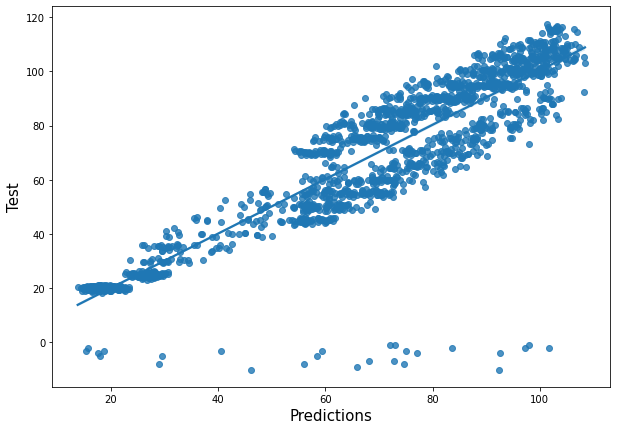


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.050233494430288295']
 ['Tenure_in_Months' '0.06109270381708413']
 ['Avg_Monthly_GB_Download' '-0.0018375035792103458']
 ['Churn_Category_Competitor' '0.7488910692731896']
 ['Churn_Category_Dissatisfaction' '-0.20775474339468208']
 ['Churn_Category_Other' '-0.7673386251639369']
 ['Churn_Category_Price' '-0.9718675043612158']
 ['Churn_Category_satisfied' '-3.519653532969629']
 ['Gender_Male' '-0.5829798124847466']
 ['Internet_Service_Yes' '37.50207608693109']
 ['Multiple_Lines_No_phone_Service' '-31.53114855826398']
 ['Multiple_Lines_Yes' '8.372763665086651']
 ['Online_Security_Yes' '1.442375921202667']
 ['Online_Backup_Yes' '4.715804231612973']
 ['Device_Protection_Plan_Yes' '4.593367885063768']
 ['Premium_Tech_Support_Yes' '0.6419965808103444']
 ['Streaming_TV_Yes' '12.828065616121464']
 ['Streaming_Movies_Yes' '12.404547342402589']
 ['Contract_One_Year' '-2.240417366638118']
 ['Contract_Two_Year' '-3.407

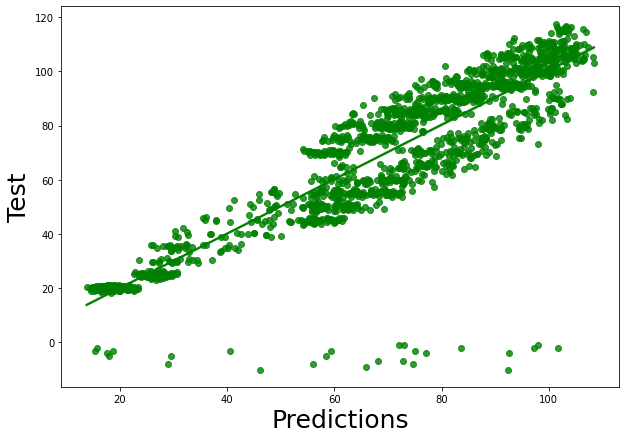

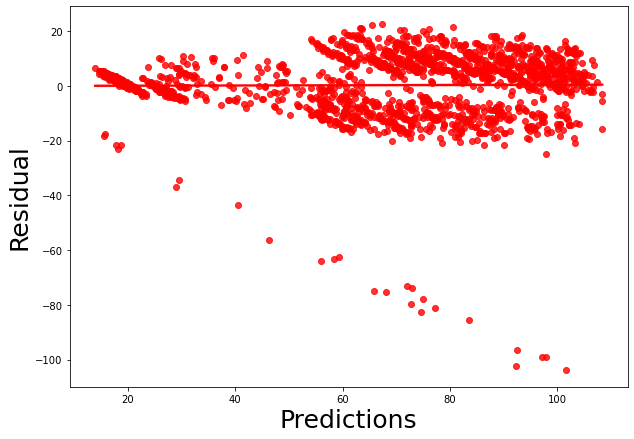

In [47]:
# Run statsmodel function
model_sm, arr_sm = get_sm_model(y_train,X_train, X_test);
# Run sklearn model
model, arr, intercept = get_sk_model(y_train,X_train, X_test);
# Run AUC
#roc(model, X_test, y_test);


In [ ]:
merge_result1.columns

Index(['Gender', 'Age', 'Married', 'Number_of_Dependents', 'Zip_Code',
       'Number_of_Referrals', 'Tenure_in_Months', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason', 'County', 'Population'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:         Monthly_Charge   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1002.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:06:16   Log-Likelihood:                -18125.
No. Observations:                4516   AIC:                         3.629e+04
Df Residuals:                    4495   BIC:                         3.643e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

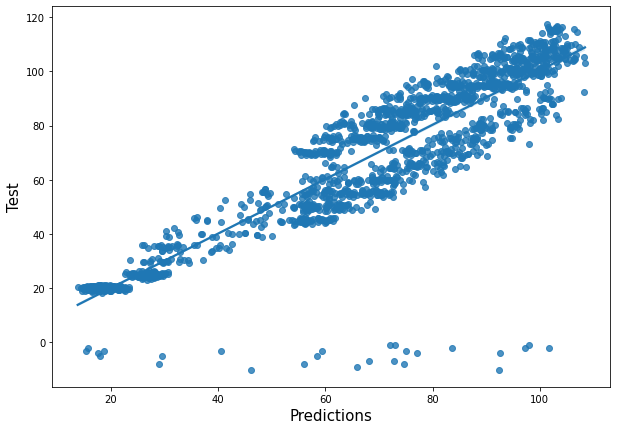


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '0.050233494430288295']
 ['Tenure_in_Months' '0.06109270381708413']
 ['Avg_Monthly_GB_Download' '-0.0018375035792103458']
 ['Churn_Category_Competitor' '0.7488910692731896']
 ['Churn_Category_Dissatisfaction' '-0.20775474339468208']
 ['Churn_Category_Other' '-0.7673386251639369']
 ['Churn_Category_Price' '-0.9718675043612158']
 ['Churn_Category_satisfied' '-3.519653532969629']
 ['Gender_Male' '-0.5829798124847466']
 ['Internet_Service_Yes' '37.50207608693109']
 ['Multiple_Lines_No_phone_Service' '-31.53114855826398']
 ['Multiple_Lines_Yes' '8.372763665086651']
 ['Online_Security_Yes' '1.442375921202667']
 ['Online_Backup_Yes' '4.715804231612973']
 ['Device_Protection_Plan_Yes' '4.593367885063768']
 ['Premium_Tech_Support_Yes' '0.6419965808103444']
 ['Streaming_TV_Yes' '12.828065616121464']
 ['Streaming_Movies_Yes' '12.404547342402589']
 ['Contract_One_Year' '-2.240417366638118']
 ['Contract_Two_Year' '-3.407

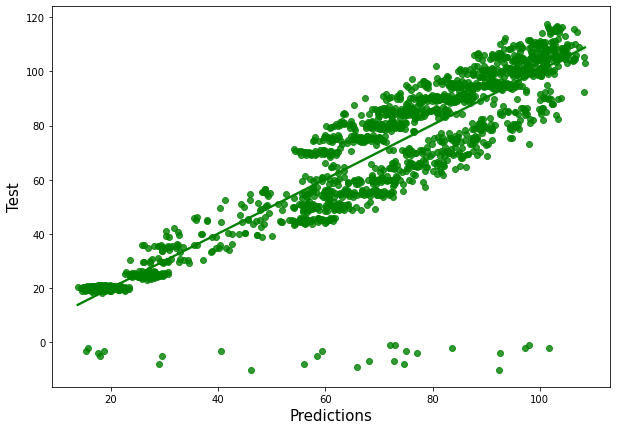

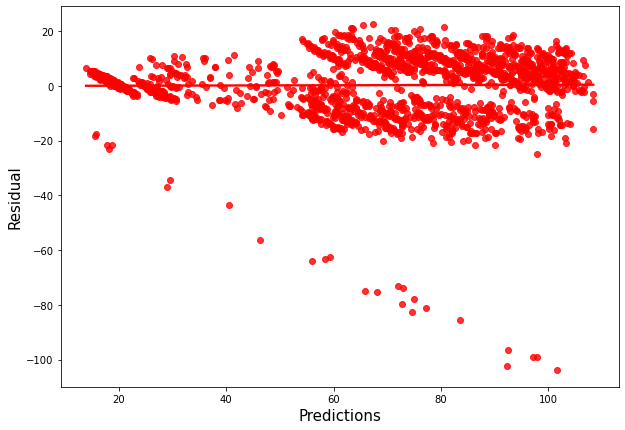

In [ ]:
data_reduced = merge_result1[['Age', 'Gender', 'Tenure_in_Months',
       'Internet_Service', 'Multiple_Lines', 'Online_Security',
       'Online_Backup', 'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Avg_Monthly_GB_Download', 'Churn_Category',
       'Monthly_Charge', 'Contract' ]]

dummy_variable_columns = [
                          'Churn_Category','Gender', 'Internet_Service', 'Multiple_Lines','Online_Security','Online_Backup',
                          'Device_Protection_Plan','Premium_Tech_Support', 'Streaming_TV','Streaming_Movies','Contract'
                         ]


data_diff = [i for i in merge_result1.columns.tolist() + data_reduced.columns.tolist() if i not in merge_result1.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variable_columns, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test);
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test);

In [ ]:
data_reduced.columns

Index(['Age', 'Gender', 'Tenure_in_Months', 'Internet_Service',
       'Multiple_Lines', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Avg_Monthly_GB_Download', 'Churn_Category',
       'Monthly_Charge', 'Contract'],
      dtype='object')

In [ ]:
data_diff

['Married',
 'Number_of_Dependents',
 'Zip_Code',
 'Number_of_Referrals',
 'Phone_Service',
 'Avg_Monthly_Long_Distance_Charges',
 'Internet_Type',
 'Paperless_Billing',
 'Payment_Method',
 'Total_Charges',
 'Total_Refunds',
 'Total_Extra_Data_Charges',
 'Total_Long_Distance_Charges',
 'Total_Revenue',
 'Customer_Status',
 'Churn_Reason',
 'County',
 'Population']

In [ ]:
equation = 'y = '
for ar in arr:
    eq = str(round(float(ar[1]),3))+' x '+str(ar[0])
    if eq.startswith('-'):
        equation = equation + ' ' + eq
    else:
        equation = equation + ' + ' +eq
    
print (equation + ' ' + str(intercept))

y =  + 0.05 x Age + 0.061 x Tenure_in_Months -0.002 x Avg_Monthly_GB_Download + 0.749 x Churn_Category_Competitor -0.208 x Churn_Category_Dissatisfaction -0.767 x Churn_Category_Other -0.972 x Churn_Category_Price -3.52 x Churn_Category_satisfied -0.583 x Gender_Male + 37.502 x Internet_Service_Yes -31.531 x Multiple_Lines_No_phone_Service + 8.373 x Multiple_Lines_Yes + 1.442 x Online_Security_Yes + 4.716 x Online_Backup_Yes + 4.593 x Device_Protection_Plan_Yes + 0.642 x Premium_Tech_Support_Yes + 12.828 x Streaming_TV_Yes + 12.405 x Streaming_Movies_Yes -2.24 x Contract_One_Year -3.408 x Contract_Two_Year 20.109456287189182
